In [1]:
%pylab inline

/home/gjones/miniconda2/envs/readout/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [2]:
from kid_readout import *
from kid_readout.roach import attenuator

In [3]:
r2 = roach.r2heterodyne.Roach2Heterodyne(roachip='r2kid',attenuator=attenuator.Attenuator(),adc_valon='/dev/ttyUSB4',lo_valon='/dev/ttyUSB3',initialize=False)

In [4]:
r1 = roach.heterodyne.RoachHeterodyne(adc_valon='/dev/ttyUSB0')

In [5]:
r1.iq_delay = 0

In [6]:
low_group = np.array([ 1119.07673511,  1126.0153982 ,  1133.70131753,  1135.31245427,
        1143.21576741,  1148.0169738 ,  1159.41786884,  1160.26943775, 1162.33,
        1176.56747357,  1177.70848608,  1181.33728799,  1186.05472363,
        1190.29108718,  1193.62180971,  1203.87755917,  1205.8392229 ,
        1207.88046178,  1220.05286255,  1221.41371349,  1235.26613658, 1243.71])

to_add = 32 - len(low_group)
low_group = np.hstack((low_group,np.arange(to_add)+low_group.max()+2.))
low_group_lo = 1110.0

high_group = np.array([1576.67969747,  1599.40494104,  1605.60503541,
        1609.7742154 ,
        1623.02,
                       1628.5448411 ,  1648.17537644,  1649.22774551,
        1650.36575278,  1662.37845567,  1664.1706628 ,  1681.28526333,
        1682.17350834,  1684.44471064,  1702.0820426 ,  1706.79635917,
        1714.66047719,
                       1720.7, 1724.39938475,  1752.05587464,  1767.515093])

to_add = 32 - len(high_group)
high_group = np.hstack((high_group,np.arange(to_add)+high_group.max()+2.))
high_group_lo = 1570.0

nsamp = 2**15
step = 1
nstep = 16
offset_bins = np.arange(-(nstep + 1), (nstep + 1)) * step
offsets = offset_bins * 512.0 / nsamp

In [7]:
r1.set_lo(low_group_lo)
r2.set_lo(low_group_lo)

In [8]:
r1.set_loopback(True)
r2.set_loopback(True)
r1.set_fft_gain(2)
r2.set_fft_gain(2)

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

detected mcnt overflow None 993901 0 65536 0 320 993901
bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
wri

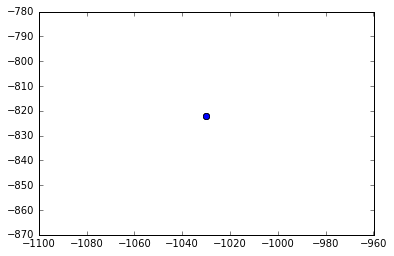

In [9]:
ri = r1
for k in range(8):
    #ri.phases=None
    ri.set_tone_freqs(low_group+1,nsamp=nsamp)
    ri.set_tone_freqs(low_group,nsamp=nsamp)
    ri.select_fft_bins(range(32))
    ri._sync()
    meas = ri.get_measurement(0.2,demod=False)
    plot_ri(meas.s21_raw[3,:].mean(),'o')

In [19]:
ri.wavenorm

0.0005054203415081975

In [21]:
meas.s21_raw.dtype

dtype('complex64')

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

bank_offset= 0 start_offset= 0 start_o

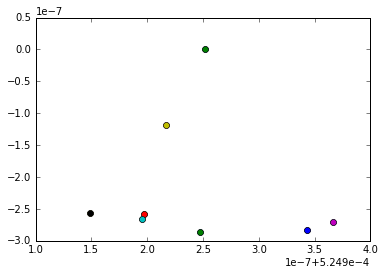

In [20]:
ri = r1
m0 = 1
for k in range(16):
#    ri.set_tone_freqs(low_group+1,nsamp=nsamp)
    ri.phases[3] = k*2*np.pi/8.
    ri.set_tone_freqs(low_group,nsamp=nsamp)
    ri.select_fft_bins(range(32))
    ri._sync()
    time.sleep(1)
    meas = ri.get_measurement(0.2,demod=False)
    if k == 0:
        m0 = meas.s21_raw[3,:].mean()
    plot_ri(meas.s21_raw[3,:].mean()*np.exp(-1j*k*2*np.pi/8.)*ri.wavenorm/(m0),'o')

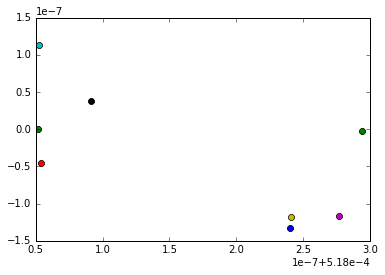

In [24]:
ri = r2
m0 = 1
for k in range(16):
#    ri.set_tone_freqs(low_group+1,nsamp=nsamp)
    ri.phases[3] = k*2*np.pi/8.
    ri.set_tone_freqs(low_group,nsamp=nsamp)
    ri.select_fft_bins(range(32))
    ri._sync()
    time.sleep(1)
    meas = ri.get_measurement(0.2,demod=False)
    if k == 0:
        m0 = meas.s21_raw[3,:].mean()
    plot_ri(meas.s21_raw[3,:].mean()*np.exp(-1j*k*2*np.pi/8.)*ri.wavenorm/(m0),'o')

In [9]:
from kid_readout.measurement import basic,core

In [51]:
def run_sweep(ri, tone_banks, num_tone_samples, length_seconds=1, state=None, description='', random_phase=False, constant_normalization=False, **kwargs):
    stream_arrays = core.MeasurementList()
    normfact = None
    for n, tone_bank in enumerate(tone_banks):
        if random_phase:
            ri.phases=None
        ri.set_tone_freqs(tone_bank, nsamp=num_tone_samples, normfact=normfact)
        if constant_normalization and n==0:
            #wn = (2.0 / normfact) * len(bins) / float(nsamp)
            normfact = (2)/(ri.wavenorm * num_tone_samples)
            print normfact
#        print ri.q_iwave.std()
        ri.select_fft_bins(np.arange(tone_bank.size))
        ri._sync()
        
        stream_arrays.append(ri.get_measurement(num_seconds=length_seconds, **kwargs))
    return basic.SweepArray(stream_arrays, state=state, description=description)

In [13]:
swa1_same = run_sweep(r1,np.add.outer(offsets,low_group),nsamp,length_seconds=.2)

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

7400.58698763
bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

7400.59058097
bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

7400.58512156
bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

7400.58352047
bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

7400.58780509
bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

7400.58633964
bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

7400.58239012
bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

7400.58374685
bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

7400.58613996
bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

7400.58450722
bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

7400.58631354
bank_offset= 0 start_offset= 0 s

In [14]:
swa2_same = run_sweep(r2,np.add.outer(offsets,low_group),nsamp,length_seconds=.2)

7108.2421097
7108.2420552
7108.24177286
7108.24292991
7108.2439332
7108.24332836
7108.24221688
7108.24360981
7108.24140643
7108.24124054
7108.2432067
7108.23797603
7108.2402481
7108.24162635
7108.24249607
7108.24167016
7108.24469407
7108.24327907
7108.24335272
7108.24280548
7108.24213248
7108.242132
7108.24237166
7108.23929428
7108.24240733
7108.24104602
7108.24242954
7108.24253238
7108.24031107
7108.24123588
7108.24167137
7108.24151868
7108.24195851
got bad packet
7108.24470889


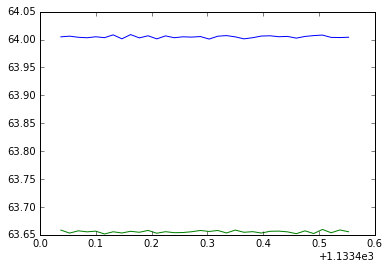

In [15]:
swp = swa1_same.sweep(2)
plot(swp.frequency_MHz_stack,20*np.log10(np.abs(swp.s21_points)))
swp = swa2_same.sweep(2)
plot(swp.frequency_MHz_stack,20*np.log10(np.abs(swp.s21_points)))


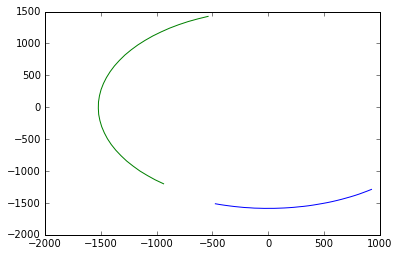

In [16]:
swp = swa1_same.sweep(2)
plot_ri(swp.s21_points)
swp = swa2_same.sweep(2)
plot_ri(swp.s21_points)

In [17]:
swa1_rand = run_sweep(r1,np.add.outer(offsets,low_group),nsamp,length_seconds=.2,random_phase=True)

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

6850.77802381
bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

7270.11871175
bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

7421.24280129
bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

6256.45502241
bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

6675.01691683
bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

7322.06834568
bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

6840.77495739
bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

7301.69226594
bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

7037.96156838
bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

7129.31215116
bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

7087.67206453
bank_offset= 0 start_offset= 0 s

In [18]:
swa2_rand = run_sweep(r2,np.add.outer(offsets,low_group),nsamp,length_seconds=.2,random_phase=True)

7569.88393106
6927.15033816
7374.00548405
7256.93251733
7680.90458226
7349.22059676
6867.85431941
7122.1135617
7435.14511757
got bad packet
7555.79893511
got weird packet (94,)
8203.59628322
7690.10140396
7596.71653026
6962.20024158
7311.44772521
6966.86081508
7229.57647429
6282.42148443
7462.53150881
7668.61672812
7161.65151091
7084.14488946
7056.05963111
got bad packet
7345.69244214
7224.04703439
6928.61127089
7091.73047635
7505.05002702
6951.99841476
7438.7696543
7328.98600685
7427.89837581
7146.83599559
6598.57344596


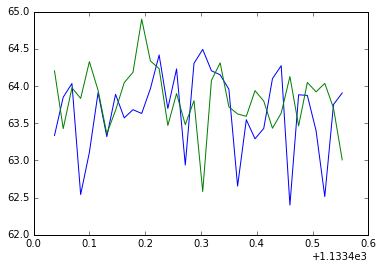

In [19]:
swp = swa1_rand.sweep(2)
plot(swp.frequency_MHz_stack,20*np.log10(np.abs(swp.s21_points)))
swp = swa2_rand.sweep(2)
plot(swp.frequency_MHz_stack,20*np.log10(np.abs(swp.s21_points)))


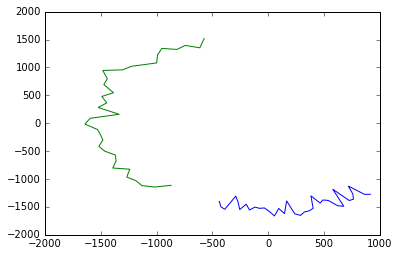

In [20]:
swp = swa1_rand.sweep(2)
plot_ri(swp.s21_points)
swp = swa2_rand.sweep(2)
plot_ri(swp.s21_points)

In [52]:
swa1_rand_const = run_sweep(r1,np.add.outer(offsets,low_group),nsamp,length_seconds=.2,random_phase=True,constant_normalization=True)

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

0.107586335778
ratio of current wavenorm to optimal: 0.860013667013
bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

ratio of current wavenorm to optimal: 0.986844399706
bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

ratio of current wavenorm to optimal: 0.862041804751
bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

ratio of current wavenorm to optimal: 0.909269497713
bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

ratio of current wavenorm to optimal: 0.987032524343
bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

ratio of current wavenorm to optimal: 1.12481468669
bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

ratio of current wavenorm to optimal: 0.872591755145
bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

ratio of current waveno

In [53]:
swa2_rand_const = run_sweep(r2,np.add.outer(offsets,low_group),nsamp,length_seconds=.2,random_phase=True,constant_normalization=True)

0.116111681527
ratio of current wavenorm to optimal: 1.00008703713
ratio of current wavenorm to optimal: 0.972079575183
ratio of current wavenorm to optimal: 0.994231060217
got bad packet
ratio of current wavenorm to optimal: 1.03240720096
ratio of current wavenorm to optimal: 0.992135728669
ratio of current wavenorm to optimal: 1.09045090009
ratio of current wavenorm to optimal: 0.957841992368
ratio of current wavenorm to optimal: 0.972125618622
ratio of current wavenorm to optimal: 1.08595577381
ratio of current wavenorm to optimal: 0.981858556595
ratio of current wavenorm to optimal: 1.02278142666
ratio of current wavenorm to optimal: 0.983625216177
ratio of current wavenorm to optimal: 1.02507422268
ratio of current wavenorm to optimal: 1.10661716777
ratio of current wavenorm to optimal: 1.00777562634
ratio of current wavenorm to optimal: 1.09117642717
ratio of current wavenorm to optimal: 1.00495474198
ratio of current wavenorm to optimal: 0.963289230602
ratio of current wavenorm 

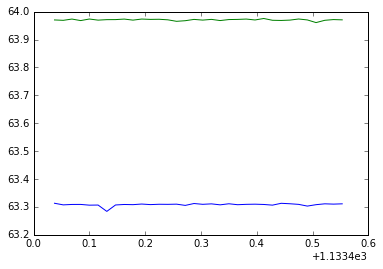

In [54]:
swp = swa1_rand_const.sweep(2)
plot(swp.frequency_MHz_stack,20*np.log10(np.abs(swp.s21_points)))
swp = swa2_rand_const.sweep(2)
plot(swp.frequency_MHz_stack,20*np.log10(np.abs(swp.s21_points)))


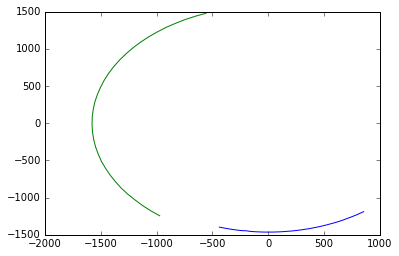

In [55]:
swp = swa1_rand_const.sweep(2)
plot_ri(swp.s21_points)
swp = swa2_rand_const.sweep(2)
plot_ri(swp.s21_points)

In [33]:
x,y = r1.get_raw_adc()

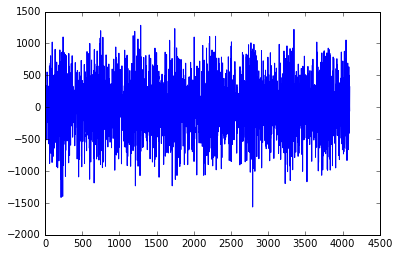

In [34]:
plot(x)

In [35]:
x,y = r2.get_raw_adc()

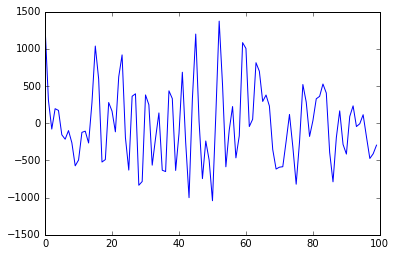

In [40]:
plot(x[:100])

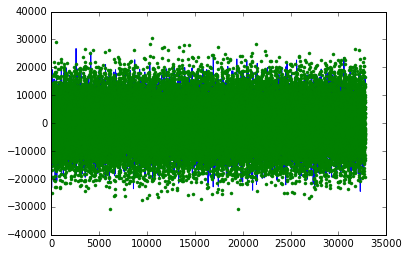

In [44]:
plot(r1.q_iwave)
plot(r2.q_iwave,'.')

In [50]:
r2.q_iwave.astype('float').ptp()

61549.0

In [38]:
r2.phases

array([ 2.53717818,  0.49448362,  2.90109445,  2.02263277,  4.75857346,
        0.98859704,  2.6441725 ,  5.06334538,  2.50205746,  4.0867192 ,
        5.27997561,  4.57532612,  1.99357503,  1.83767284,  6.0752197 ,
        0.35492406,  2.62451043,  3.2516237 ,  2.53376496,  0.20822708,
        0.86066951,  3.03267712,  2.52121262,  4.38363248,  1.94616174,
        3.00010508,  3.70316948,  4.05743815,  0.49455317,  1.77651146,
        1.33576919,  2.26122877])

In [39]:
r1.phases

array([ 2.49219157,  4.35024074,  4.86830568,  4.45655096,  2.35514047,
        5.6768045 ,  3.68178873,  2.72721911,  2.40125745,  3.52673475,
        4.8946273 ,  3.8204063 ,  4.14780187,  4.26461795,  5.87763632,
        6.18886864,  2.33411365,  1.80806148,  5.69750316,  5.28741055,
        4.3834338 ,  1.23792397,  5.63187988,  5.3565881 ,  0.52299059,
        4.70149211,  4.62931991,  4.26378705,  3.55278577,  4.24673263,
        4.90456274,  5.83043689])